In [2]:
#### !/usr/local/bin/env python
from __future__ import division
import numpy as np
from numpy import array
from numpy.random import sample as rs
from numpy import newaxis as na
import pandas as pd 
from scipy.stats import distributions
from scipy.stats import sem
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from radd.rl import multirace, analyzer
from scipy.stats import pearsonr

temporal_dynamics = lambda p, t: np.cosh(p['xb'][:, na] * t)
updateQ = lambda q, winner, r, A: q[winner][-1] + A*(r - q[winner][-1])
boltzmann_choiceP = lambda q, name, B: np.exp(B*q[name][-1])/np.sum([np.exp(B*q[k][-1]) for k in q.keys()])

homedir = os.path.expanduser('~')

In [4]:
uniform = pd.read_csv(os.path.join(homedir, 'Dropbox/Projects/SSBayes/clean/uniform_clean.csv'), index_col=0)
early = pd.read_csv(os.path.join(homedir, 'Dropbox/Projects/SSBayes/clean/early_clean.csv'), index_col=0)
late = pd.read_csv(os.path.join(homedir, 'Dropbox/Projects/SSBayes/clean/late_clean.csv'), index_col=0)
re = pd.read_csv(os.path.join(homedir, 'Dropbox/Projects/SS/Reactive/Re_Data.csv'), index_col=0)

In [5]:
resc = re.query('ttype=="stop" & Cond=="bsl"').pivot_table(index='idx', columns='ssd', values='acc').mean()
earlysc = early.query('ttype=="stop"').pivot_table(index='idx', columns='ssd', values='acc').mean()
unisc = uniform.query('ttype=="stop"').pivot_table(index='idx', columns='ssd', values='acc').mean()
latesc = late.query('ttype=="stop"').pivot_table(index='idx', columns='ssd', values='acc').mean()
plt.plot(resc.values)
plt.plot(earlysc.values, color='Green')
plt.plot(unisc.values, color='k')
plt.plot(latesc.values, color='b')

In [6]:
#sns.distplot(re.query('ttype=="go"&acc==1').rt.values, hist=True, kde_kws={'shade':True}, bins=25)
sns.distplot(uniform.query('ttype=="go"&acc==1').rt.values, hist=False, kde_kws={'shade':True, 'bw':.01}, label='Uniform')
sns.distplot(late.query('ttype=="go"&acc==1').rt.values, hist=False, kde_kws={'shade':True, 'bw':.01}, label='Late')
sns.distplot(early.query('ttype=="go"&acc==1').rt.values, hist=False, kde_kws={'shade':True, 'bw':.01}, label='Early')
ax=plt.gca()
plt.setp(ax, xlim=(.3,.8))

[0.3, 0.8]

## Early

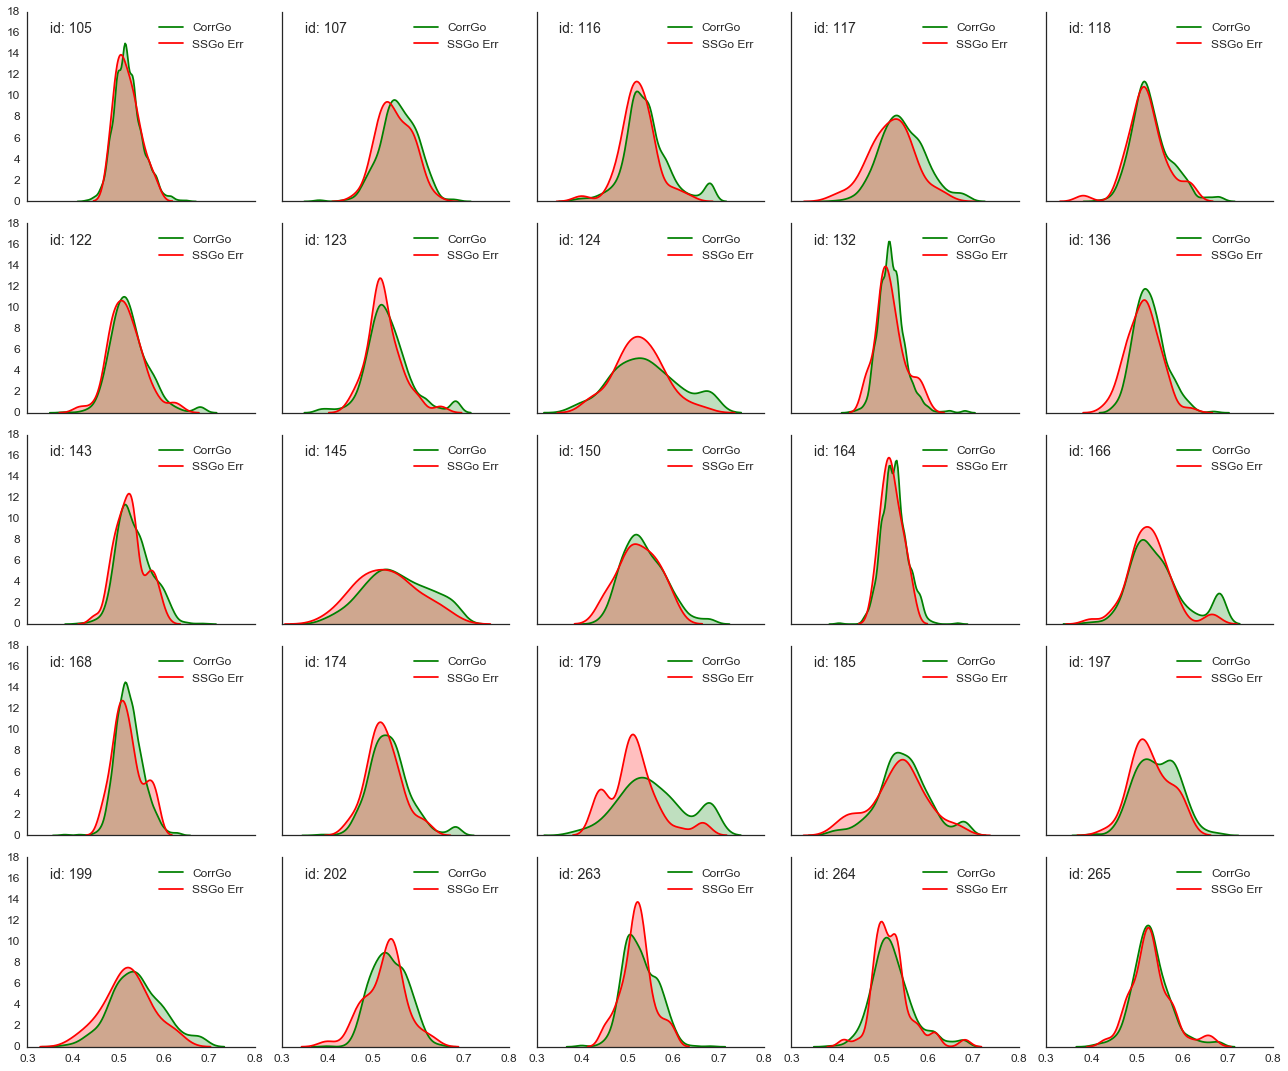

In [64]:
sns.set(style='white', font_scale=1.2)
f, axes = plt.subplots(5,5, figsize=(18, 15), sharex=True, sharey=True)
for i, (idx, idxdf) in enumerate(early.groupby('idx')):
    ax=axes.flatten()[i]
    sns.distplot(idxdf[(idxdf.ttype=='go')&(idxdf.acc==1)].rt.values, ax=ax, color='g', hist=False, kde_kws={'shade':True}, label='CorrGo')
    sns.distplot(idxdf[(idxdf.ttype=='stop')&(idxdf.acc==0)].rt.values, ax=ax, color='r', hist=False, kde_kws={'shade':True}, label='SSGo Err')
    sns.despine(ax=ax)
    ax.text(.35, 16, 'id: ' + str(idx), fontsize=14)
    if not ax.is_first_col:
        plt.setp(ax, yticklabels=[])
    if not ax.is_last_row:
        plt.setp(ax, xticklabels=[])
    f.subplots_adjust(wspace=.1, hspace=.07)
    ax.legend(loc = 1)
plt.tight_layout()
#f.savefig('/Users/kyle/Dropbox/CoAx/Projects/SSBayes/early_idx_rts.png', dpi=400)